Individual Planning Report Group 43 - Anson Ng Student ID (34713040) 


**Data description**

In [6]:
#load library first
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


There are two datasets the player dataset, and the session dataset. The player dataset is the dataset that contains information regarding each player that has logged on to play the game.

This includes

- experience 
- subscription
- hashedEmail 
- played_hours 
- name
- gender
- Age

The Session dataset is a dataset that illustrates the start play time and the end play time of each person for every session they play. Thus there are identicical hashed emails with two or more start and end times. The original start and end time is another value that representes the start and end time but it is recorded in the form of UNIX time.

The variables include

- hashedEmail
- start_time
- end_time
- original_start_time (in UNIX time (milliseconds))
- original_end_time (in UNIX time (milliseconds))

Based on the datasets, there are three types of variables within the player dataset. 
1. "experience", "name", "hashedEmail" and "gender" are character factors since their output are words.
2. "subscribe" is a logical factor which means either true or false
3. "played_hours", and "age" are numbers that include decimals.


- "experience" details the level of gaming skill each player possess, this ranges range from amateur, Pro, Veteran and beginner. 
- "name" details the players real life name
- "hashEmail" details the code that the game has given the player to identify the player, this is equivalent to a gamer ID to remember who the player is through code.
- "gender" details the players gender which can either be "male", "female", "other" and "prefer not to say" for those who choose not to answer
- "subscribe" determines whether the player has chosen to subscribe to the newsletter those who have selected "true" while those who didn't select "false"
- "played_hours" refers to the amount of hours each player has played in total
- "age" refers to how old the player is. 
It is important to note that within the "Age" variable there are values that are NA thus when processing the data we must remember to pass the command that ignores NA. Additionally the gender column does not only include "Male" and "Female", but also "Prefer not to say", and other thus may need to be filtered if we choose to only calculate "Male" and "Female".

The session dataset is the dataset that notes each time a player starts and end their game time. This dataset contains information including 

- "hashedEmail" details the player who is playing. It uses the same variable as the "hashedEmail" of the player file; thus if necessary, we can combine to see what time each player starts or ends and their information. 
- "start_time" details the date and time that the player starts playing the game. It is important to note that this column has two pieces of information, the start_time date and time which may require additional wrangling. 
- "end_time" details the date and time that the player has finished playing the game. Similar to the "start_time", it contains both the data and time so it will also require additional wrangling. 
- "original_start_time" is the same variable as the start_time but is formatted as a UNIX time (milliseconds). 
- "original_end_time" is the same variable as the end_time but is formatted as a UNIX time (milliseconds). 

With the steps detailed in later steps, we will be able to determine the mean value of certain quantitative data within our tables include 
1. "played_hours" the average amount of hours played being "5.85 (hours)"  
2. "age"   the average age of players being "21.14 (years old)"

**Question** 

**Broad Question:**
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific Question:**
From a player’s gender or played_hours, which is more predictive in determining the likelihood of subscribing to the game-related newsletter?

**Data and Approach:**
My question will be addressed by comparing the predictive ability of gender and played_hours. To do this, I plan to apply a linear regression model to assess which variable — gender or played_hours — provides higher predictive accuracy. Before applying the model, the data will need to be wrangled. This includes:
- Filtering out any missing or unavailable values,
- Selecting only the relevant columns: played_hours, gender, and subscription,
- Converting the gender variable to a categorical predictor, and
- Ensuring that played_hours is stored as a numeric variable.
    
Notably the session data is not necessary as we are using the total played hours not each session to determine the predictability. 

**Exploring Data Analysis**

To explore the data we can start with is the summary of variables. Not all variables can provide a summary statistic, for example, the "name", "gender", "subscription", "experience" and "hashedEmail" wouldn't be able to provide a summary statistic as they aren't quantitative data. Instead we focus on the quantitative variables that can be used to calculate the mean value; this includes "played_hours" and "age". 

We will use the R commands as stated below to wrangle and summarize the data. 

First we make sure we are able to load the data 

In [7]:
#load the datasets
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

players
sessions    

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


Wrangling data is important because we first must make sure that the variables are workable and easy to read thus our first steps is to ensure that our data is able to be process. In order to wrangle the data to perform exploratory visuals of our data, 
we should
- Select only the relevant columns
- Remove missing or invalid values
- Convert variables to the desired type

In [8]:
#filter and select to find (mean) for "played_hours" and "age"
mean_data <- players |> 
select(played_hours, Age) |> 
summarize(mean_played_hours = round(mean(played_hours,na.rm = TRUE ),2), mean_age = round(mean(Age,  na.rm = TRUE),2))

mean_data

mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


In [12]:
# wrangling the data
wrangled_players <- players |> 
  select(subscribe, played_hours, gender) |>
filter(!is.na(played_hours), !is.na(gender), !is.na(subscribe)) |> 
  mutate(subscribe = as.factor(subscribe),gender = as.factor(gender), played_hours = as.numeric(played_hours))

wrangled_players 

subscribe,played_hours,gender
<fct>,<dbl>,<fct>
FALSE,0,Male
TRUE,0,Female
TRUE,0,Female
⋮,⋮,⋮
TRUE,178.2,Female
TRUE,218.1,Non-binary
TRUE,223.1,Male


With the Wrangled data, we are able to perform a few exploratory visualizations 

In [26]:
gender_ver_subscribe <- wrangled_players |>
ggplot(aes(x=subscribe, fill = gender)) + 
geom_bar() + 
labs(x = "subscribed", y="count", fill = "gender", title = "Subscription by Gender" ) + 
theme_minimal()

summary_subscribe <- wrangled_players |>
  group_by(subscribe) |>
  summarise(mean_hours = mean(played_hours, na.rm = TRUE))

hours_ver_subscribe <- ggplot(summary_subscribe, aes(x = subscribe, y = mean_hours, fill = subscribe)) +
  geom_col() +
  labs(title = "Average Played Hours by Subscription Status", x = "Subscription Status",y = "Average Played Hours (hours)",fill = "Subscribed")


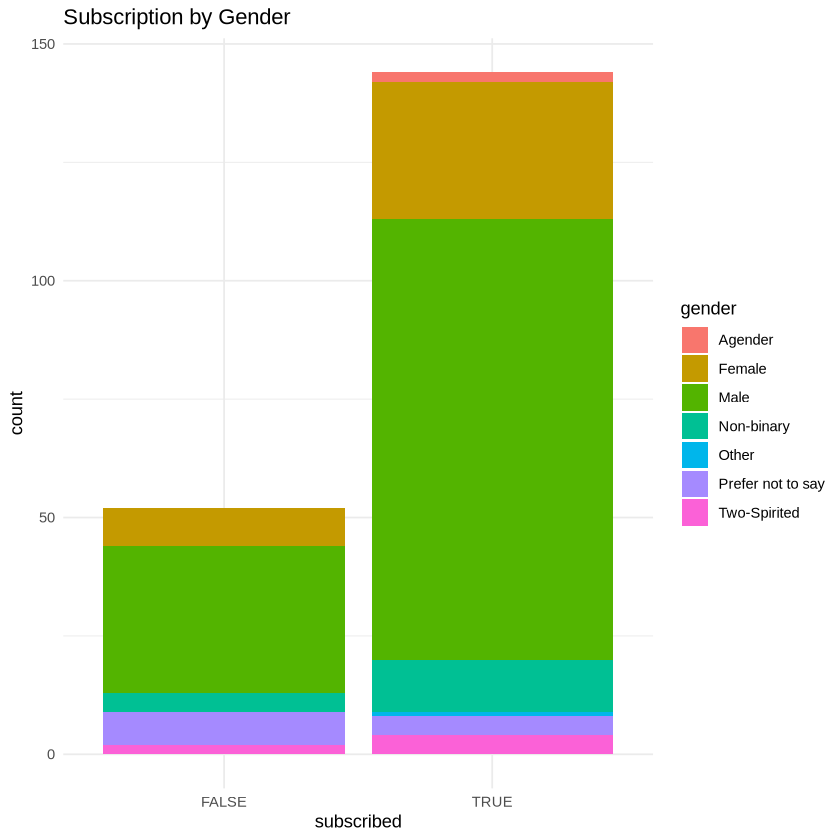

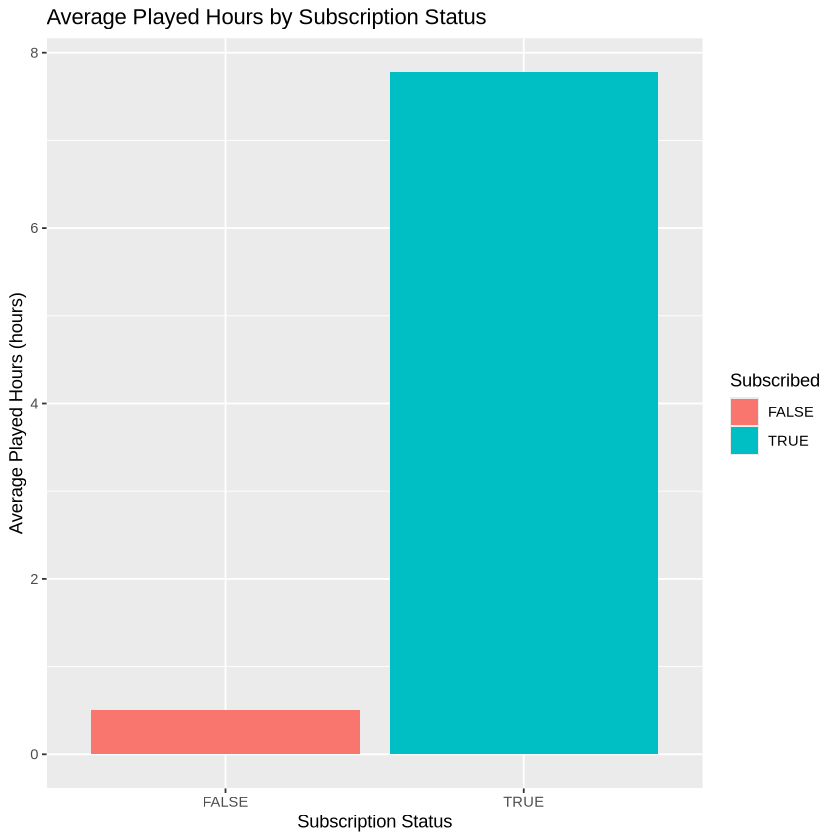

In [27]:
gender_ver_subscribe
hours_ver_subscribe

**Method and Plan**